In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy.stats import norm
warnings.filterwarnings(action="ignore")
%matplotlib inline
sns.set_style('white')
sns.set_context('talk')
np.random.seed(0)

In [2]:
data = np.random.normal(75, 10,30)
data

array([92.64052346, 79.00157208, 84.78737984, 97.40893199, 93.6755799 ,
       65.2272212 , 84.50088418, 73.48642792, 73.96781148, 79.10598502,
       76.44043571, 89.54273507, 82.61037725, 76.21675016, 79.43863233,
       78.33674327, 89.94079073, 72.94841736, 78.13067702, 66.45904261,
       49.47010184, 81.53618595, 83.64436199, 67.5783498 , 97.69754624,
       60.45634325, 75.45758517, 73.1281615 , 90.32779214, 89.6935877 ])

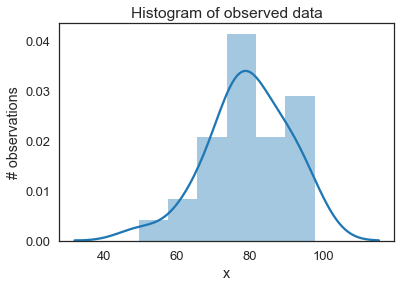

In [3]:
ax = plt.subplot()
sns.distplot(data, kde=True, ax = ax)
_ = ax.set(title='Histogram of observed data', xlabel='x', ylabel='# observations')

In [4]:
def calc_posterior_analytical(data, x, mu_0, sigma_0, sigma):
    n = len(data)
    mu_post = ((sigma**2)*mu_0+data.sum()*(sigma_0**2)) / (n*(sigma_0**2)+sigma**2)
    sigma_post = ((sigma**2)*(sigma_0**2)) / (n*(sigma_0**2)+sigma**2)
    return norm(mu_post, np.sqrt(sigma_post)).pdf(x)

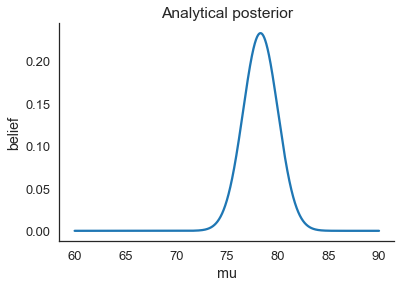

In [5]:
ax = plt.subplot()
x = np.linspace(60, 90, 5000)
posterior_analytical = calc_posterior_analytical(data, x, 70., 5., 10.)
ax.plot(x, posterior_analytical)
ax.set(xlabel='mu', ylabel='belief', title='Analytical posterior')
sns.despine()

In [6]:
def sampler(data, samples=4, mu_init=.5, proposal_width=.5, mu_prior_mu=0, mu_prior_sd=1., data_sd=1.):
    mu_current = mu_init
    posterior = [mu_current]
    for i in range(samples):
        mu_proposal = norm(mu_current, proposal_width).rvs()
        
        likelihood_current = norm(mu_current, data_sd).pdf(data).prod()
        likelihood_proposal = norm(mu_proposal, data_sd).pdf(data).prod()
        
        prior_current = norm(mu_prior_mu, mu_prior_sd).pdf(mu_current)
        prior_proposal = norm(mu_prior_mu, mu_prior_sd).pdf(mu_proposal)
        
        p_current = likelihood_current * prior_current
        p_proposal = likelihood_proposal * prior_proposal
        
        p_accept = p_proposal / p_current

        accept = np.random.rand() < p_accept
        
        if accept:
            mu_current = mu_proposal
        posterior.append(mu_current)
    return np.array(posterior)

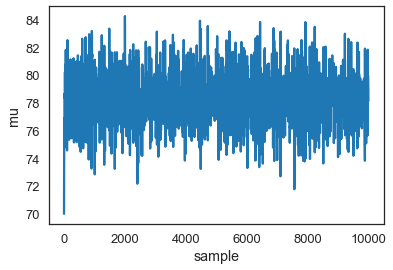

In [7]:
posterior = sampler(data, samples=10000, mu_init=70, proposal_width=10., mu_prior_mu=70., mu_prior_sd=5., data_sd=10.)
fig, ax = plt.subplots()
ax.plot(posterior)
_ = ax.set(xlabel='sample', ylabel='mu')

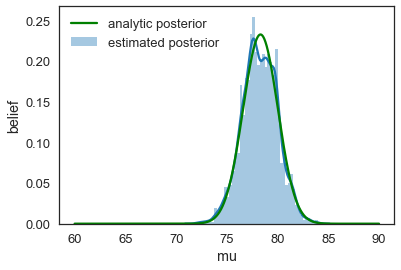

In [8]:
ax = plt.subplot()

sns.distplot(posterior[500:], ax=ax, label='estimated posterior')
x = np.linspace(60, 90, 5000)
post = calc_posterior_analytical(data, x, 70., 5., 10.)
ax.plot(x, post, 'g', label='analytic posterior')
_ = ax.set(xlabel='mu', ylabel='belief')
ax.legend();